In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams['figure.figsize'] = (7, 3.5)
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
def plot_waterfall(basename, t0, f0=8435.75e6, *, fc=None, span=None):
    NFFT = 2**16
    fs = 6.144e6
    n_int = 938
    x = np.fromfile(f'{basename}x', 'float32').reshape(-1, NFFT)
    y = np.fromfile(f'{basename}y', 'float32').reshape(-1, NFFT)
    stokes_I = x / np.average(x) + y / np.average(y)
    plt.figure(figsize=(8, 5))
    a = mdates.date2num(t0)
    b = mdates.date2num(t0 + (x.shape[0] * 1e9 * n_int * NFFT / fs) * np.timedelta64(1, 'ns'))
    plt.imshow(10*np.log10(stokes_I).T[::-1], aspect='auto', extent=[a, b, 1e-6*(f0 - fs/2), 1e-6*(f0 + fs/2)],
               vmin=2, vmax=9)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.ylabel('Frequency (MHz)')
    plt.xlabel('UTC time')
    plt.title('Hera waterfall (Stokes I)')
    if span is not None:
        plt.ylim(fc-0.5*span, fc+0.5*span)
    plt.figure()
    faxis = f0 + np.fft.fftshift(np.fft.fftfreq(NFFT, 1/fs))
    if span is not None:
        sel = (faxis * 1e-6 >= fc - 0.5*span) & (faxis * 1e-6 <= fc + 0.5 * span)
    else:
        sel = np.arange(faxis.size)
    plt.plot(faxis[sel] * 1e-6, 10*np.log10(np.average(stokes_I[:, sel], axis=0)))
    plt.title('Hera average power spectral density (Stokes I)')
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('PSD (dB)')

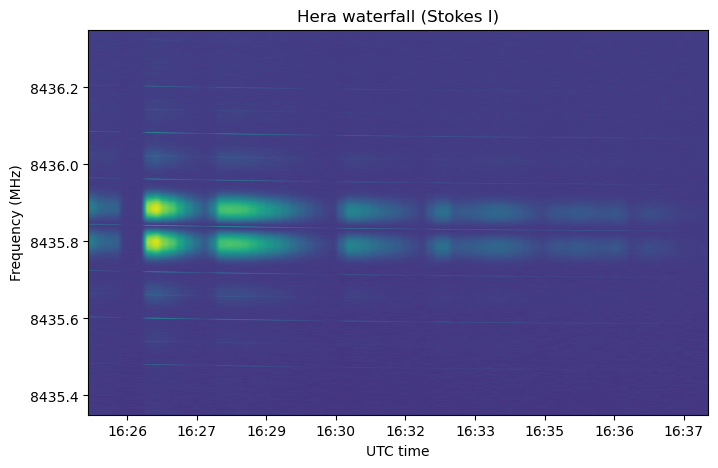

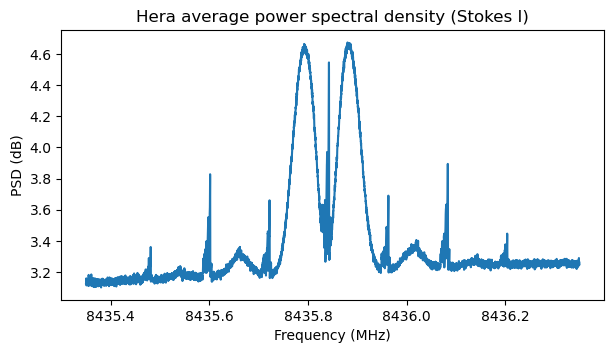

In [3]:
plot_waterfall('/data/HERA/waterfall/HERA_2024-10-07T16_25_0',
               np.datetime64('2024-10-07T16:25:35.1372627766927083', 'ns'),
               fc=8435.85, span=1)

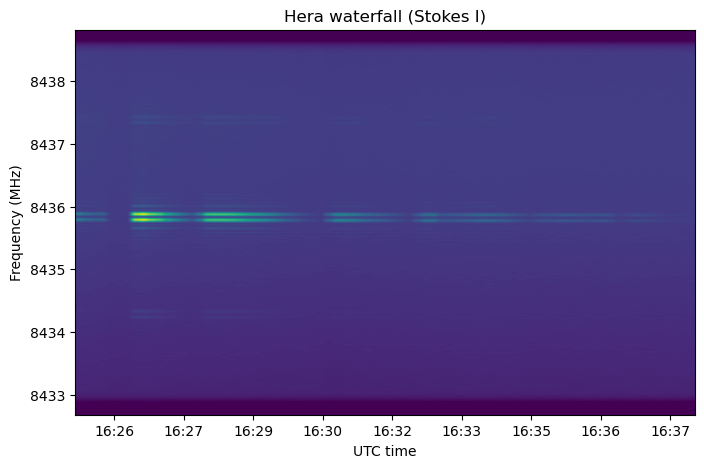

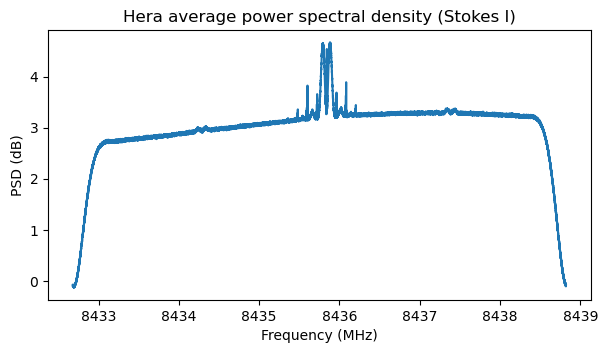

In [4]:
plot_waterfall('/data/HERA/waterfall/HERA_2024-10-07T16_25_0',
               np.datetime64('2024-10-07T16:25:35.1372627766927083', 'ns'))

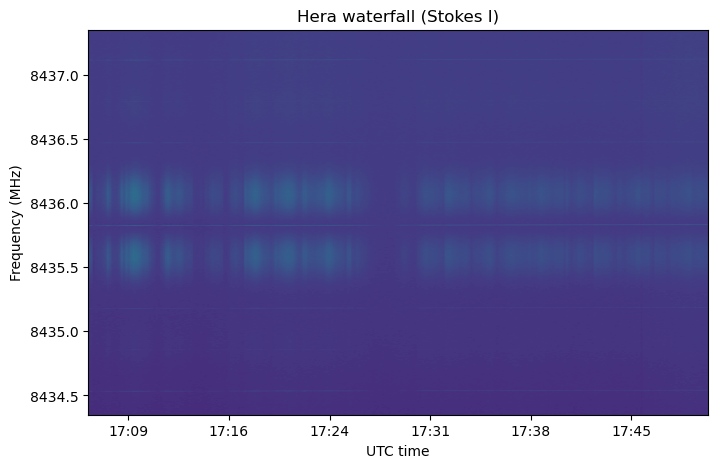

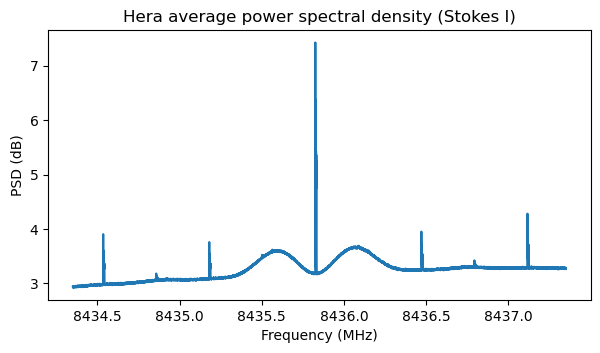

In [5]:
plot_waterfall('/data/HERA/waterfall/HERA_2024-10-07T17_06_0',
               np.datetime64('2024-10-07T17:06:43.1342333455403646', 'ns'),
               fc=8435.85, span=3)

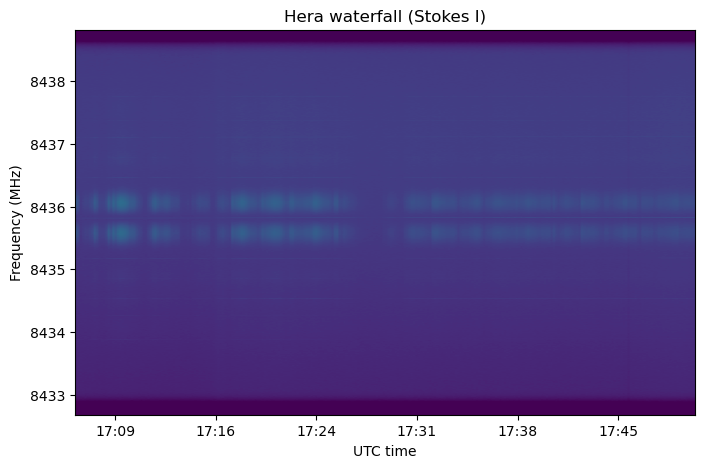

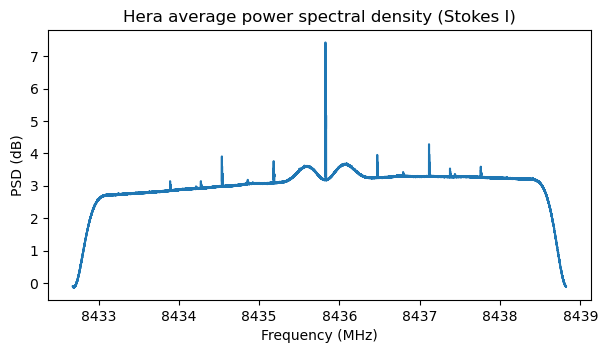

In [6]:
plot_waterfall('/data/HERA/waterfall/HERA_2024-10-07T17_06_0',
               np.datetime64('2024-10-07T17:06:43.1342333455403646', 'ns'))